In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torchvision import transforms

# Define a list of transformations

# Apply the transformations to your dataset
# For example:
# transformed_dataset = YourDataset(transform=transform)

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
    ]),
}
data_dir = 'C:\Users\Danis\Data'
image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train','val']}
datasets_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(datasets_sizes)  # Corrected variable name

class_names = image_datasets['train'].classes

class_names
model = models.resnet18(pretrained=True)

for name, param in model.named_parameters():
    if "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Corrected optimizer instantiation

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 15

for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)  # Fixed typo

            optimizer.zero_grad()  # Fixed typo

            with torch.set_grad_enabled(phase == 'train'):  # Fixed method name
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)  # Fixed typo
                loss = criterion(outputs, labels)  # Fixed variable name

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.item() * inputs.size(0)  # Fixed calculation
                running_corrects += torch.sum(preds == labels.data)  # Fixed calculation

        epoch_loss = running_loss / datasets_sizes[phase]  # Fixed variable name
        epoch_acc = running_corrects.double() / datasets_sizes[phase]  # Fixed calculation

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')  # Fixed formatting
    
correct_predictions = 0
total_predictions = 0

for phase in ['train', 'val']:
    for inputs, labels in dataloaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        correct_predictions += torch.sum(preds == labels.data)
        total_predictions += labels.size(0)

overall_accuracy = correct_predictions.double() / total_predictions
print(f'Overall Accuracy: {overall_accuracy:.4f}')

print('Training complete')
torch.save(model.state_dict(), 'resnet_15epoch_model_new.ptht')


{'train': 1102, 'val': 426}


C:\Users\HP\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train Loss: 2.1000 Acc: 0.3975
val Loss: 1.3657 Acc: 0.5446
train Loss: 1.2226 Acc: 0.5835
val Loss: 1.1229 Acc: 0.6502
train Loss: 1.1614 Acc: 0.5962
val Loss: 0.7279 Acc: 0.7559
train Loss: 1.0077 Acc: 0.6561
val Loss: 0.8140 Acc: 0.7300
train Loss: 1.0186 Acc: 0.6488
val Loss: 0.7723 Acc: 0.7371
train Loss: 0.9580 Acc: 0.6688
val Loss: 0.6220 Acc: 0.7746
train Loss: 0.9828 Acc: 0.6715
val Loss: 0.5354 Acc: 0.8028
train Loss: 0.9339 Acc: 0.6706
val Loss: 0.6467 Acc: 0.7629
train Loss: 1.0015 Acc: 0.6770
val Loss: 0.5380 Acc: 0.8099
train Loss: 0.9519 Acc: 0.6788
val Loss: 0.6254 Acc: 0.8028
train Loss: 0.8733 Acc: 0.7087
val Loss: 0.4612 Acc: 0.8357
train Loss: 0.8955 Acc: 0.7042
val Loss: 0.5387 Acc: 0.8263
train Loss: 0.9848 Acc: 0.6679
val Loss: 0.6559 Acc: 0.8005
train Loss: 0.8651 Acc: 0.7078
val Loss: 0.4674 Acc: 0.8404
train Loss: 0.8666 Acc: 0.7024
val Loss: 0.5979 Acc: 0.7958
Overall Accuracy: 0.8331
Training complete


In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torchvision import transforms

# Define a list of transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=15),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Set data directory path
data_dir = 'C:\Users\Danis\Data'

# Load datasets with transformations
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
datasets_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(datasets_sizes)  # Corrected variable name

# Get class names
class_names = image_datasets['train'].classes

# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

num_classes = 7  # Number of classes in your dataset
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)

# Freeze feature extraction layers and unfreeze the final classifier layer
for param in model.parameters():
    param.requires_grad = False
for name, param in model.named_parameters():
    if "fc" in name:
        param.requires_grad = True

# Define loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training parameters
num_epochs = 15

def calculate_confusion_matrix(model, dataloader, device):
    """Calculates the overall confusion matrix for the model."""
    all_predictions = torch.tensor([], dtype=torch.long)
    all_labels = torch.tensor([], dtype=torch.long)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_predictions = torch.cat((all_predictions, preds), dim=0)
            all_labels = torch.cat((all_labels, labels), dim=0)

    confusion_matrix = torch.zeros(len(class_names), len(class_names))
    for label, prediction in zip(all_labels, all_predictions):
        print(f"Label: {label}, Prediction: {prediction}")
        confusion_matrix[label][prediction] += 1

    return confusion_matrix

for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / datasets_sizes[phase]
        epoch_acc = running_corrects.double() / datasets_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    # Calculate and print confusion matrix after each epoch
    confusion_matrix = calculate_confusion_matrix(model, dataloaders['val'], device)
    print(f'Confusion Matrix for Epoch {epoch+1}:\n{confusion_matrix}')

correct_predictions = 0
total_predictions = 0

for phase in ['train', 'val']:
    for inputs, labels in dataloaders[phase]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        correct_predictions += torch.sum(preds == labels.data)
        total_predictions += labels.size(0)

overall_accuracy = correct_predictions.double() / total_predictions
print(f'Overall Accuracy: {overall_accuracy:.4f}')

print('Training complete')
torch.save(model.state_dict(), 'resnet_15confusionepoch_model.pth')


{'train': 1102, 'val': 426}
train Loss: 1.4902 Acc: 0.4628
val Loss: 1.0621 Acc: 0.6596
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 3, Prediction: 5
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 1, Prediction: 1
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 2, Prediction: 4
Label: 2, Prediction: 0
Label: 5, Prediction: 5
Label: 6, Prediction: 0
Label: 3, Prediction: 0
Label: 3, Prediction: 1
Label: 4, Prediction: 4
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 6, Prediction: 5
Label: 1, Prediction: 1
Label: 6, Prediction: 0
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 6, Prediction: 0
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 3, Prediction: 3
Label: 1, Prediction: 5
Label: 2, Prediction: 1
Label: 2, Prediction: 1
Label: 2, Prediction: 2
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 1, Prediction: 1


train Loss: 1.1174 Acc: 0.6134
val Loss: 0.8636 Acc: 0.7019
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 6, Prediction: 0
Label: 6, Prediction: 0
Label: 1, Prediction: 1
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 3, Prediction: 1
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 1, Prediction: 0
Label: 0, Prediction: 0
Label: 5, Prediction: 0
Label: 6, Prediction: 0
Label: 3, Prediction: 3
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 6, Prediction: 0
Label: 3, Prediction: 0
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 5, Prediction: 1
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 5, Prediction: 0
Label: 3, Prediction: 3
Label: 3, Prediction: 0
Label: 6, Prediction: 0
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 3, Prediction: 0
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 3, Prediction: 3
Labe

train Loss: 1.0448 Acc: 0.6334
val Loss: 0.7881 Acc: 0.7207
Label: 2, Prediction: 1
Label: 3, Prediction: 3
Label: 6, Prediction: 3
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 6, Prediction: 6
Label: 2, Prediction: 3
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 0, Prediction: 1
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 6, Prediction: 0
Label: 0, Prediction: 6
Label: 5, Prediction: 1
Label: 3, Prediction: 1
Label: 6, Prediction: 0
Label: 6, Prediction: 3
Label: 1, Prediction: 1
Label: 2, Prediction: 1
Label: 0, Prediction: 3
Label: 2, Prediction: 1
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 2, Prediction: 1
Label: 6, Prediction: 6
Label: 5, Prediction: 1
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Labe

train Loss: 0.9917 Acc: 0.6570
val Loss: 0.7287 Acc: 0.7441
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Label: 5, Prediction: 1
Label: 0, Prediction: 0
Label: 6, Prediction: 3
Label: 3, Prediction: 3
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Label: 0, Prediction: 6
Label: 2, Prediction: 1
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 3, Prediction: 1
Label: 5, Prediction: 0
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 2, Prediction: 1
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 6, Prediction: 0
Label: 3, Prediction: 3
Label: 3, Prediction: 1
Label: 3, Prediction: 3
Label: 4, Prediction: 1
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 5, Prediction: 3
Label: 3, Prediction: 0
Label: 6, Prediction: 6
Labe

train Loss: 1.0150 Acc: 0.6397
val Loss: 0.5463 Acc: 0.7864
Label: 5, Prediction: 5
Label: 0, Prediction: 6
Label: 2, Prediction: 2
Label: 2, Prediction: 2
Label: 0, Prediction: 6
Label: 4, Prediction: 1
Label: 2, Prediction: 2
Label: 6, Prediction: 0
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 0, Prediction: 6
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 3, Prediction: 0
Label: 4, Prediction: 4
Label: 3, Prediction: 1
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 6, Prediction: 0
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 2, Prediction: 4
Label: 2, Prediction: 2
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Labe

train Loss: 0.9254 Acc: 0.6788
val Loss: 0.6330 Acc: 0.7934
Label: 2, Prediction: 4
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 6, Prediction: 6
Label: 3, Prediction: 3
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 6, Prediction: 5
Label: 6, Prediction: 0
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 2, Prediction: 2
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 0, Prediction: 6
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 6, Prediction: 6
Labe

train Loss: 0.8943 Acc: 0.6851
val Loss: 0.5297 Acc: 0.8169
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 6, Prediction: 3
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 0, Prediction: 6
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Labe

train Loss: 0.8705 Acc: 0.6824
val Loss: 0.6701 Acc: 0.7793
Label: 5, Prediction: 5
Label: 2, Prediction: 4
Label: 0, Prediction: 0
Label: 6, Prediction: 0
Label: 0, Prediction: 0
Label: 0, Prediction: 6
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 6, Prediction: 3
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 0, Prediction: 6
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 1, Prediction: 4
Label: 3, Prediction: 3
Label: 3, Prediction: 1
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 6, Prediction: 3
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 5, Prediction: 5
Label: 0, Prediction: 6
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 2, Prediction: 2
Labe

train Loss: 0.8542 Acc: 0.7087
val Loss: 0.5423 Acc: 0.8286
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 2, Prediction: 2
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 6, Prediction: 6
Label: 0, Prediction: 6
Label: 6, Prediction: 0
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 0, Prediction: 6
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 0, Prediction: 6
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 3, Prediction: 0
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 6, Prediction: 3
Labe

train Loss: 0.9200 Acc: 0.6851
val Loss: 0.5473 Acc: 0.8122
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 6, Prediction: 6
Label: 0, Prediction: 3
Label: 5, Prediction: 5
Label: 4, Prediction: 6
Label: 1, Prediction: 1
Label: 0, Prediction: 6
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 1, Prediction: 1
Label: 6, Prediction: 3
Label: 2, Prediction: 2
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 0, Prediction: 6
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Label: 1, Prediction: 6
Label: 0, Prediction: 0
Label: 2, Prediction: 4
Label: 1, Prediction: 1
Label: 5, Prediction: 5
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Labe

train Loss: 0.7970 Acc: 0.7205
val Loss: 0.6537 Acc: 0.7887
Label: 1, Prediction: 1
Label: 6, Prediction: 0
Label: 6, Prediction: 6
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 5, Prediction: 1
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 0, Prediction: 1
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 0, Prediction: 1
Label: 4, Prediction: 1
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 6, Prediction: 0
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 3, Prediction: 3
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 3, Prediction: 1
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 6, Prediction: 6
Label: 6, Prediction: 6
Label: 5, Prediction: 1
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Labe

train Loss: 0.8966 Acc: 0.6978
val Loss: 0.5626 Acc: 0.7981
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 6, Prediction: 6
Label: 6, Prediction: 0
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 6, Prediction: 6
Label: 6, Prediction: 0
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 2, Prediction: 1
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 2, Prediction: 1
Label: 6, Prediction: 6
Label: 6, Prediction: 6
Label: 1, Prediction: 1
Label: 5, Prediction: 1
Label: 5, Prediction: 5
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 0, Prediction: 0
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 6, Prediction: 6
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 0, Prediction: 6
Label: 4, Prediction: 4
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Labe

train Loss: 0.9075 Acc: 0.6788
val Loss: 0.5159 Acc: 0.8263
Label: 5, Prediction: 5
Label: 2, Prediction: 1
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 0, Prediction: 0
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 2, Prediction: 2
Label: 1, Prediction: 1
Label: 0, Prediction: 6
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 0, Prediction: 0
Label: 6, Prediction: 6
Label: 5, Prediction: 3
Label: 1, Prediction: 1
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 3, Prediction: 3
Label: 5, Prediction: 0
Label: 6, Prediction: 6
Label: 2, Prediction: 4
Label: 1, Prediction: 1
Label: 6, Prediction: 6
Label: 4, Prediction: 4
Label: 6, Prediction: 6
Label: 0, Prediction: 6
Labe

train Loss: 0.8733 Acc: 0.7024
val Loss: 0.7123 Acc: 0.7887
Label: 2, Prediction: 1
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 0, Prediction: 1
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 1, Prediction: 1
Label: 1, Prediction: 1
Label: 0, Prediction: 0
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 3, Prediction: 3
Label: 0, Prediction: 0
Label: 6, Prediction: 6
Label: 1, Prediction: 1
Label: 2, Prediction: 2
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 3, Prediction: 3
Label: 6, Prediction: 3
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 2, Prediction: 3
Labe

train Loss: 0.8975 Acc: 0.6887
val Loss: 0.3724 Acc: 0.8779
Label: 4, Prediction: 4
Label: 3, Prediction: 3
Label: 3, Prediction: 3
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 5, Prediction: 5
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 0, Prediction: 0
Label: 6, Prediction: 3
Label: 2, Prediction: 4
Label: 5, Prediction: 5
Label: 5, Prediction: 5
Label: 6, Prediction: 6
Label: 6, Prediction: 6
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 5, Prediction: 5
Label: 4, Prediction: 4
Label: 0, Prediction: 0
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 4, Prediction: 4
Label: 1, Prediction: 1
Label: 0, Prediction: 0
Label: 1, Prediction: 1
Label: 5, Prediction: 5
Label: 0, Prediction: 0
Label: 3, Prediction: 3
Label: 6, Prediction: 6
Label: 3, Prediction: 0
Label: 2, Prediction: 2
Label: 0, Prediction: 6
Label: 2, Prediction: 2
Label: 3, Prediction: 3
Label: 6, Prediction: 0
Labe

Overall Accuracy: 0.8665
Training complete


In [6]:
import torch
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn

# Define the new model with the correct architecture
new_model = models.resnet18(pretrained=True)
num_classes = 7  # Number of classes in your dataset
num_features = new_model.fc.in_features
new_model.fc = nn.Linear(num_features, num_classes)

# Load the state dictionary into the new model
new_model.load_state_dict(torch.load('resnet_15confusionepoch_model.pth'))
new_model.eval()

image_path = 'ricetest.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)
with torch.no_grad():
    output = new_model(input_batch)

_, predicted_class = output.max(1)

class_names = ['Rice', 'canola', 'cotton', 'maize', 'peanut', 'sugarcane', 'wheat']
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: Rice


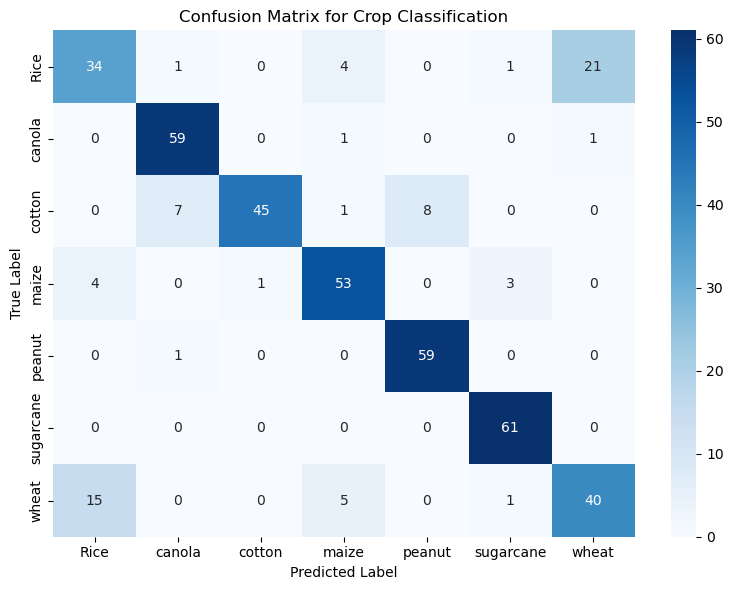

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
cm_data = [[34.,  1.,  0.,  4.,  0.,  1., 21.],
        [ 0., 59.,  0.,  1.,  0.,  0.,  1.],
        [ 0.,  7., 45.,  1.,  8.,  0.,  0.],
        [ 4.,  0.,  1., 53.,  0.,  3.,  0.],
        [ 0.,  1.,  0.,  0., 59.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 61.,  0.],
        [15.,  0.,  0.,  5.,  0.,  1., 40.]]

# Class names for labels
class_names = ['Rice', 'canola', 'cotton', 'maize', 'peanut', 'sugarcane', 'wheat']

# Create the confusion matrix visualization
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm_data, annot=True, fmt=".0f", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)  # Customize colormap if desired
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Crop Classification")
plt.tight_layout()

# Save the visualization as an image
plt.savefig("vggconfusionmatrix.png")  # Replace with your desired filename

# Display the visualization (optional)
plt.show()  # Comment out if you only want to save the image


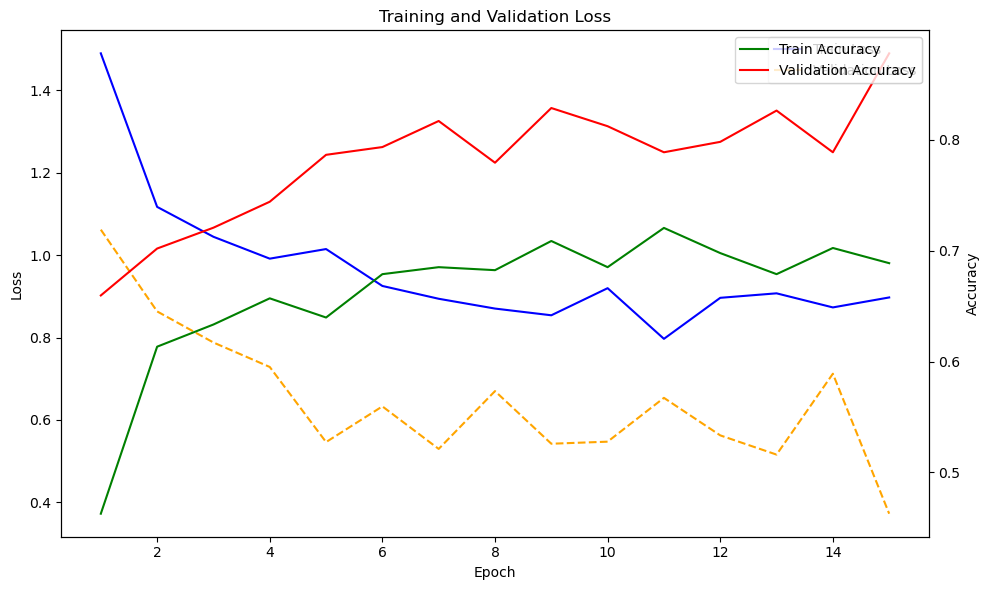

In [6]:
import matplotlib.pyplot as plt

# Define epoch numbers
epochs = range(1, 16)  # 1 to 15 (inclusive)

# Training and validation loss data
train_loss = [1.4902, 1.1174, 1.0448, 0.9917, 1.0150, 0.9254, 0.8943, 0.8705, 0.8542, 0.9200, 0.7970, 0.8966, 0.9075, 0.8733, 0.8975]
val_loss = [1.0621, 0.8636, 0.7881, 0.7287, 0.5463, 0.6330, 0.5297, 0.6701, 0.5423, 0.5473, 0.6537, 0.5626, 0.5159, 0.7123, 0.3724]

# Training and validation accuracy data
train_acc = [0.4628, 0.6134, 0.6334, 0.6570, 0.6397, 0.6788, 0.6851, 0.6824, 0.7087, 0.6851, 0.7205, 0.6978, 0.6788, 0.7024, 0.6887]
val_acc = [0.6596, 0.7019, 0.7207, 0.7441, 0.7864, 0.7934, 0.8169, 0.7793, 0.8286, 0.8122, 0.7887, 0.7981, 0.8263, 0.7887, 0.8779]

# Create a figure
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot loss
plt.plot(epochs, train_loss, label='Train Loss', color='b', linestyle='--')  # Blue, solid line
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--')  # Orange, dashed line
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Create a second subplot for accuracy
ax2 = plt.twinx()  # Share the x-axis with the previous plot
plt.plot(epochs, train_acc, 'g-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')  # Adjust legend location if needed

# Tight layout for better spacing
plt.tight_layout()

# Save the visualization as an image (optional)
plt.savefig("model_performance2.png")  # Replace with your desired filename

# Display the visualization
plt.show()


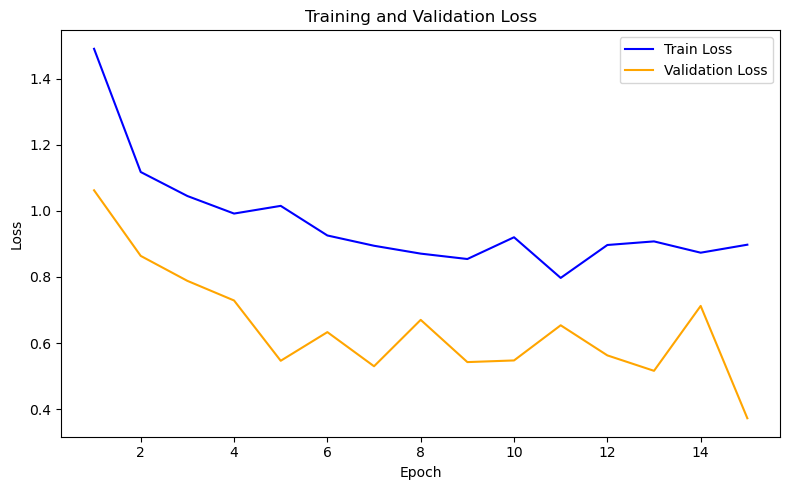

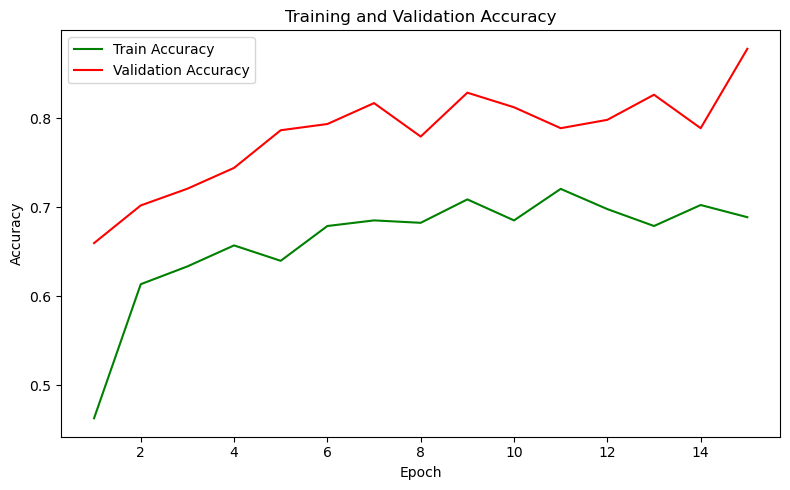

In [10]:
import matplotlib.pyplot as plt

# Define epoch numbers
epochs = range(1, 16)  # 1 to 15 (inclusive)

# Training and validation loss data
train_loss = [1.4902, 1.1174, 1.0448, 0.9917, 1.0150, 0.9254, 0.8943, 0.8705, 0.8542, 0.9200, 0.7970, 0.8966, 0.9075, 0.8733, 0.8975]
val_loss = [1.0621, 0.8636, 0.7881, 0.7287, 0.5463, 0.6330, 0.5297, 0.6701, 0.5423, 0.5473, 0.6537, 0.5626, 0.5159, 0.7123, 0.3724]

# Create a figure
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

# Plot loss
plt.plot(epochs, train_loss, label='Train Loss', color='b', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='-')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Save the image: Training_Validation_Loss.png
plt.savefig("Training_Validation_finalLoss.png")

# Clear the plot to avoid overlapping elements in the next image
plt.show()  # Clear the current figure
# Training and validation accuracy data
train_acc = [0.4628, 0.6134, 0.6334, 0.6570, 0.6397, 0.6788, 0.6851, 0.6824, 0.7087, 0.6851, 0.7205, 0.6978, 0.6788, 0.7024, 0.6887]
val_acc = [0.6596, 0.7019, 0.7207, 0.7441, 0.7864, 0.7934, 0.8169, 0.7793, 0.8286, 0.8122, 0.7887, 0.7981, 0.8263, 0.7887, 0.8779]

# Create a figure
plt.figure(figsize=(8, 5))  # Adjust figure size as needed

# Plot accuracy
plt.plot(epochs, train_acc, 'g-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Tight layout for better spacing
plt.tight_layout()

# Save the image: Training_Validation_Accuracy.png
plt.savefig("Training_Validation_finalAccuracy.png")

# Display the plot (optional, you can comment this out)
plt.show()



In [8]:
import torch
from torchvision import models, transforms
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F

# Define the new model with the correct architecture
new_model = models.resnet18(pretrained=True)
num_classes = 7  # Number of classes in your dataset
num_features = new_model.fc.in_features
new_model.fc = nn.Linear(num_features, num_classes)

# Load the state dictionary into the new model
new_model.load_state_dict(torch.load('resnet_15confusionepoch_model.pth'))
new_model.eval()

image_path = 'wheattt.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)
with torch.no_grad():
    output = new_model(input_batch)

probs = F.softmax(output, dim=1)
confidence_score, predicted_class = torch.max(probs, 1)

class_names = ['Rice', 'canola', 'cotton', 'maize', 'peanut', 'sugarcane', 'wheat']
predicted_class_name = class_names[predicted_class.item()]

if confidence_score.item() > 0.7:
    print(f'The predicted class is: {predicted_class_name}')
    print(f'Confidence score: {confidence_score.item()}')
else:
    print('No Class Found')


The predicted class is: wheat
Confidence score: 0.9002199769020081
